In [35]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import graphviz

# 1 Теория

# 2 Теория

# 3 Теория

$H(S) = \frac{1}{2} ln((2\pi e)^n \cdot |\Sigma|)$ Нам нужно доказать, что энтропия многомерного нормального распределения равна $H(S)$

Энтропия равна $$h(p) = -\int\limits_{\mathcal{R}^n}p(\vec{x})\cdot ln(p(\vec{x}))d\vec{x}$$ Подставим в данное выражение плотность многомерного нормального распредедления(dim = n)
$$h(p) = -\int\limits_{\mathcal{R}^n} (\frac{1}{2\pi})^{\frac{n}{2}} \cdot \frac{1}{\sqrt{|\Sigma|}} 
e^{-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)}   \cdot (-\frac{1}{2} \cdot ln((2\pi)^n \cdot |\Sigma|) -\frac{1}{2} \cdot (x - \mu)^T\Sigma^{-1}(x - \mu)) d\vec{x}$$


$-\frac{1}{2} \cdot ln((2\pi)^n \cdot |\Sigma|)$ - не зависит от х, то есть константа, а она домножается на плотность многомерного нормального, инеграл которой по $\mathcal{R}^n$ равен единицы. То есть первое слагаемое будет попросту равно $\frac{1}{2} \cdot ln((2\pi)^n \cdot |\Sigma|) $

Осталось посчитать
$$h(p) = -\int\limits_{\mathcal{R}^n} (\frac{1}{2\pi})^{\frac{n}{2}} \cdot \frac{1}{\sqrt{|\Sigma|}} 
e^{-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)}   \cdot (-\frac{1}{2} \cdot (x - \mu)^T\Sigma^{-1}(x - \mu)) d\vec{x}$$
А это просто матожидание $-\frac{1}{2} \cdot (x - \mu)^T\Sigma^{-1}(x - \mu)$ по мере(многомерного нормального)


Обозначим за $\sigma^{-1}_{i,j} - $ элементы матрицы $\Sigma^{-1}$
Распишем: $E(x - \mu)^T\Sigma^{-1}(x - \mu) =$/ Возьмем просто найдем значение квадратичной формы /$= E\sum\limits_{j = 1}^{n}\sum\limits_{i = 1}^{n} \sigma^{-1}_{i,j}(x_i - \mu_i)(x_i - \mu_j) = \sum\limits_{j = 1}^{n}\sum\limits_{i = 1}^{n} \sigma^{-1}_{i,j}E(x_i - \mu_i)(x_i - \mu_j) =$/ так как Сигма - матрица ковариаций /$= \sum\limits_{j = 1}^{n}\sum\limits_{i = 1}^{n} \sigma^{-1}_{i,j}\sigma_{i,j} =$ / Воспользуемся симметричностью матрицы ковариаций / = $\sum\limits_{j = 1}^{n}\sum\limits_{i = 1}^{n} \sigma^{-1}_{i,j}\sigma_{j,i} = tr(\Sigma^{-1}\cdot \Sigma) = n$ То есть мы получили просто след единичной матрицы, а он равен ее размерности, которая в нашем случае равна n


Итого, полученная нами энтропия равна: $$\frac{1}{2} \cdot ln((2\pi)^n \cdot |\Sigma| + \frac{1}{2}\cdot n =
  \frac{1}{2}(ln((2\pi)^n \cdot |\Sigma| + n) = \frac{1}{2}(ln((2\pi)^n \cdot |\Sigma| \cdot e^n)$$
$ЧТД \blacksquare$

In [43]:
data = pd.read_csv('./german.data-numeric.txt', delim_whitespace=True, header=None)

In [45]:
data.head()

0   1   2   3   4   5   6   7   8   9  ...  15  16  17  18  19  20  21  22  \
0   1   6   4  12   5   5   3   4   1  67 ...   0   0   1   0   0   1   0   0   
1   2  48   2  60   1   3   2   2   1  22 ...   0   0   1   0   0   1   0   0   
2   4  12   4  21   1   4   3   3   1  49 ...   0   0   1   0   0   1   0   1   
3   1  42   2  79   1   4   3   4   2  45 ...   0   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53 ...   1   0   1   0   0   0   0   0   

   23  24  
0   1   1  
1   1   2  
2   0   1  
3   1   1  
4   1   2  

[5 rows x 25 columns]

24 - target

In [46]:
data.shape


(1000, 25)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus 
from IPython.display import Image

In [47]:
algo = DecisionTreeClassifier()
algo.fit(data.drop([24], axis=1), data[24])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
dot_data = tree.export_graphviz(algo, out_file="small_tree.out", 
                         feature_names=data.columns[:-1],  
                         class_names=['Good', 'Bad'],  
                         filled=True, rounded=True,  
                         special_characters=True)

In [61]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
img = Image(graph.create_png(), retina=True)

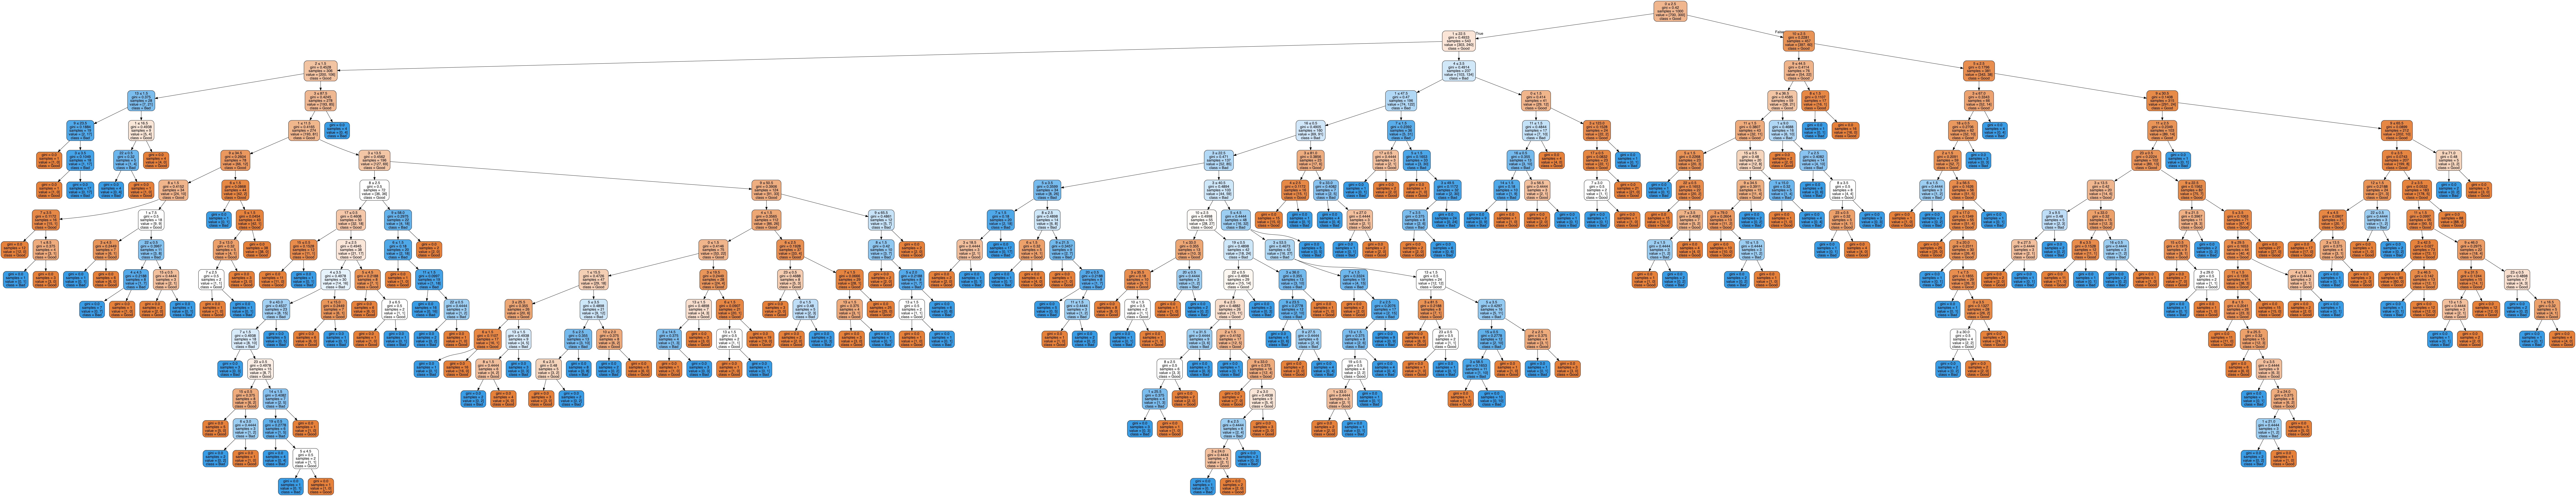

In [63]:
img

In [68]:
# with open('graph_german.png', 'wb') as f:
#     f.write(img.data)

In [69]:
cross_val_score

NameError: name 'cross_val_score' is not defined

# Не забыть посмотреть на разбиения первые. А так же график построить

In [322]:
errors = []
for depth in tqdm(range(1, 23)):
    errors.append(cross_val_score(DecisionTreeClassifier(max_depth=depth), data.drop([24], axis=1), data[24]).mean())

100%|██████████| 22/22 [00:00<00:00, 36.31it/s]


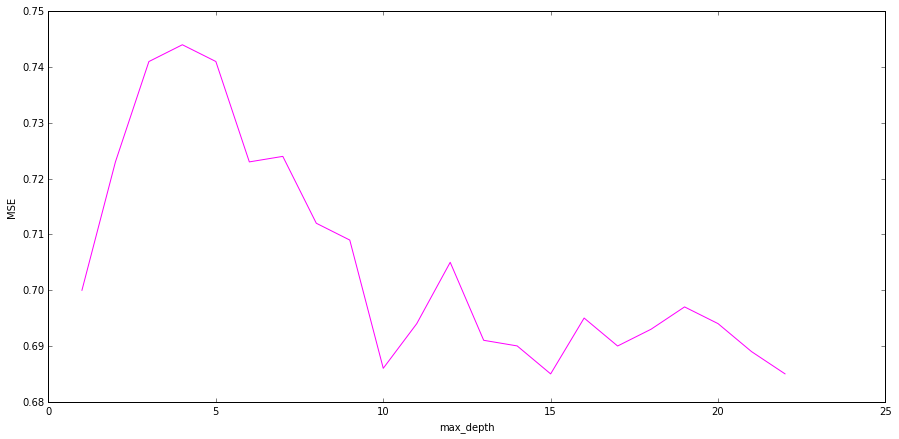

In [326]:
plt.figure(figsize=(15,7))
plt.plot(range(1,23), errors, color='magenta')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show()

# 3 Реализация решающего дерева (опциональная часть)

In [99]:
from sklearn import datasets

In [100]:
boston = datasets.load_boston()

In [101]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [78]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [88]:
X_test

array([[  2.36482000e+01,   0.00000000e+00,   1.81000000e+01, ...,
          2.02000000e+01,   3.96900000e+02,   2.36900000e+01],
       [  2.79570000e-01,   0.00000000e+00,   9.69000000e+00, ...,
          1.92000000e+01,   3.96900000e+02,   1.35900000e+01],
       [  5.18800000e-02,   0.00000000e+00,   4.49000000e+00, ...,
          1.85000000e+01,   3.95990000e+02,   1.28600000e+01],
       ..., 
       [  1.51902000e+00,   0.00000000e+00,   1.95800000e+01, ...,
          1.47000000e+01,   3.88450000e+02,   3.32000000e+00],
       [  4.20300000e-02,   2.80000000e+01,   1.50400000e+01, ...,
          1.82000000e+01,   3.95010000e+02,   8.16000000e+00],
       [  9.37800000e-02,   1.25000000e+01,   7.87000000e+00, ...,
          1.52000000e+01,   3.90500000e+02,   1.57100000e+01]])

In [87]:
algo.decision_path(X_test.ix[0])

AttributeError: 'numpy.ndarray' object has no attribute 'ix'

In [ ]:
DecisionTreeClassifier()

In [81]:
from sklearn.cross_validation import train_test_split, cross_val_score

In [92]:
from tqdm import tqdm

In [297]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(boston.data), pd.DataFrame(boston.target), random_state=42)

In [104]:
y_train

0
472  23.2
498  21.2
132  23.0
2    34.7
122  20.5
35   18.9
82   24.8
258  36.0
502  20.6
276  33.2
232  41.7
357  21.7
393  13.8
428  11.0
445  11.8
392   9.7
241  20.1
461  17.7
386  10.5
314  23.8
127  16.2
195  50.0
462  19.5
137  17.1
395  13.1
361  19.9
421  14.2
235  24.0
274  32.4
275  32.0
..    ...
8    16.5
415   7.2
337  18.5
28   18.4
447  12.6
466  19.0
374  13.8
234  29.0
470  19.9
170  17.4
47   16.6
422  20.8
306  33.4
384   8.8
345  17.5
437   8.7
156  13.1
332  19.4
163  50.0
153  19.4
453  17.8
150  21.5
26   16.6
259  30.1
209  20.0
475  13.3
382  11.3
225  50.0
227  31.6
9    18.9

[379 rows x 1 columns]

In [298]:
X_train.shape

(379, 13)

In [299]:
y_train

0
182  37.9
155  15.6
280  45.4
126  15.7
329  22.6
31   14.5
113  18.7
148  17.8
432  16.1
338  20.6
57   31.6
194  29.1
24   15.6
17   17.5
298  22.5
66   19.4
211  19.3
404   8.5
94   20.6
154  17.0
441  17.1
23   14.5
225  50.0
433  14.3
447  12.6
5    28.7
116  21.2
45   19.3
16   23.1
468  19.1
..    ...
276  33.2
443  15.4
191  30.5
385   7.2
293  23.9
413  16.3
343  23.9
257  50.0
308  22.8
149  15.4
130  19.2
151  19.6
359  22.6
99   33.2
372  50.0
87   22.2
458  14.9
330  19.8
214  23.7
466  19.0
121  20.3
505  11.9
20   13.6
188  29.8
71   21.7
106  19.5
270  21.1
348  24.5
435  13.4
102  18.6

[379 rows x 1 columns]

In [300]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [327]:
class DecisionTree:
    '''A decision tree regressor
    
    '''
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        
        # Check parameters
        self.max_depth = ((2 ** 31) - 1 if self.max_depth is None
                     else self.max_depth)
     
        self.tree = [-1] * (2 ** max_depth - 1)
        self.samples = [None] * (2 ** max_depth - 1)
        self.targets = [None] * (2 ** max_depth - 1)
    
    def fit(self, X, y):
        ''' Criterion is 'gini' by default
        
        '''
        self.samples[0] = X
        self.targets[0] = y
        
        for cur_node in tqdm(range(len(self.tree))):
            if self.tree[cur_node] is None or self.samples[cur_node] is None:
                self.tree[cur_node] = None
                continue
                
            if cur_node * 2 + 1 >= len(self.tree):
                self.tree[cur_node] = None
                continue
            
            left_son = 2 * cur_node + 1
            right_son = 2 * cur_node + 2
            
            top_feature = None
            top_threshold = None
            top_information = np.inf
            
            cur_samples = self.samples[cur_node]
            cur_targets = self.targets[cur_node]                
            
            print(cur_node)
            for feature_id  in range(X.shape[1]):
                
                srtd_values = sorted(cur_samples[feature_id])
                for i in range(1, len(cur_samples)):
                    
                    if srtd_values[i] == srtd_values[i - 1]:
                        continue
                    threshold = (srtd_values[i] + srtd_values[i - 1]) / 2.
                    
                    samples_to_left = cur_samples[cur_samples[feature_id] <= threshold]
                    samples_to_right =  cur_samples[~(cur_samples[feature_id] <= threshold)]
                    targets_to_left = cur_targets[cur_targets.index.isin(samples_to_left.index)]
                    targets_to_right = cur_targets[cur_targets.index.isin(samples_to_right.index)]
                    
                    mse_left = 0 if len(samples_to_left) == 0 \
                    else  mean_squared_error(targets_to_left, [targets_to_left.mean()[0]] * len(targets_to_left))
                        
                    mse_right = 0 if len(samples_to_right) == 0 \
                    else mean_squared_error(targets_to_right, [targets_to_right.mean()[0]] * len(targets_to_right))

                    current_information = float(len(samples_to_left)) / len(cur_samples) * mse_left + \
                                          float(len(samples_to_right)) / len(cur_samples) * mse_right

                    if current_information < top_information:
                        top_feature = feature_id
                        top_threshold = threshold
                        top_information = current_information
            
            if mean_squared_error(cur_targets, [cur_targets.mean()[0]] * len(cur_targets)) < top_information:
                self.tree[cur_node] = None # Means that we are in leaf now
                continue
                
            
            self.samples[left_son] = cur_samples[cur_samples[top_feature] <= top_threshold]
            self.samples[right_son] = cur_samples[~(cur_samples[top_feature] <= top_threshold)]
            self.targets[left_son] = cur_targets[cur_targets.index.isin(self.samples[left_son].index)]
            self.targets[right_son] = cur_targets[cur_targets.index.isin(self.samples[right_son].index)]
            
            self.tree[cur_node] = (top_feature, top_threshold, top_information)
            
            print(len(self.samples[left_son]), len(self.samples[right_son]))
            
            if len(self.samples[left_son]) < 2:
                self.tree[left_son] = None
            if len(self.samples[right_son]) < 2:
                self.tree[right_son] = None
            

    def predict(self, X):
        answers = []
        for elem in X.values:
            cur_node = 0
            while self.tree[cur_node] is not None:
                top_feature, top_threshold, _ = self.tree[cur_node]
                
                cur_node = cur_node * 2 + 1 if elem[top_feature] <= top_threshold else cur_node * 2 + 2
            
            answers.append(self.targets[cur_node].mean()[0])
            
        return np.array(answers)

In [328]:
my_algo = DecisionTree(5)

In [329]:
my_algo.fit(X_train, y_train)

  0%|          | 0/31 [00:00<?, ?it/s]

0
(314, 65)

  3%|▎         | 1/31 [00:05<02:45,  5.52s/it]


1
(187, 127)

  6%|▋         | 2/31 [00:10<02:31,  5.23s/it]


2
(40, 25)

 10%|▉         | 3/31 [00:11<01:52,  4.01s/it]


3
(4, 183)

 13%|█▎        | 4/31 [00:14<01:39,  3.70s/it]


4
(76, 51)

 16%|█▌        | 5/31 [00:16<01:21,  3.13s/it]


5
(38, 2)

 19%|█▉        | 6/31 [00:16<01:00,  2.43s/it]


6
(24, 1)

 23%|██▎       | 7/31 [00:17<00:44,  1.85s/it]


7
(3, 1)
8
(140, 43)

 29%|██▉       | 9/31 [00:20<00:38,  1.74s/it]


9
(10, 66)

 32%|███▏      | 10/31 [00:21<00:33,  1.58s/it]


10
(18, 33)

 35%|███▌      | 11/31 [00:22<00:26,  1.31s/it]


11
(2, 36)

 39%|███▊      | 12/31 [00:23<00:23,  1.25s/it]


12
(1, 1)
13
(11, 13)

100%|██████████| 31/31 [00:23<00:00,  1.29it/s]

In [330]:
my_algo.tree

[(5, 6.9409999999999998, 46.543375655267546),
 (12, 14.399999999999999, 22.947518983702434),
 (5, 7.4369999999999994, 39.644913076923075),
 (7, 1.3848500000000001, 16.566260848601736),
 (0, 7.0841399999999997, 11.192049356833492),
 (0, 7.3934249999999997, 21.656348684210517),
 (0, 2.742235, 18.344799999999992),
 (0, 10.109175, 0.0),
 (5, 6.5430000000000001, 8.5263808525316325),
 (6, 73.299999999999997, 7.9786315789473683),
 (12, 19.73, 7.4425856605268379),
 (7, 1.88595, 13.663435672514622),
 (0, 48.612145000000005, 0.0),
 (7, 3.2074499999999997, 11.539865967365962),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [331]:
results = my_algo.predict(X_test)

In [332]:
mean_absolute_error(y_test, results)

2.8619306022061926

In [333]:
mean_squared_error(y_test, results)

14.730439484828855

In [334]:
results[0]

21.530714285714279

In [335]:
from sklearn.tree import DecisionTreeRegressor

In [336]:
ssd = DecisionTreeRegressor(max_depth=5)
ssd.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [337]:
resiki = ssd.predict(X_test)

In [338]:
mean_absolute_error(y_test, resiki)

2.3872369858822213

In [339]:
mean_squared_error(y_test, resiki)

11.034058989489894

In [173]:
15 * 2 + 2

32

In [146]:
len(X_train)

379

In [145]:
sum(X_train[0] <= 6.7369500000000002)

310

In [111]:
mean_squared_error([1,3,3,7], [2,2,2,2])

7.0